<a href="https://colab.research.google.com/github/mirana60/git_tutorial/blob/master/%E3%80%90SIGNATE%E3%80%91%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E3%81%AE%E7%94%9F%E5%AD%98%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validation Accuracy: 0.8651685393258427


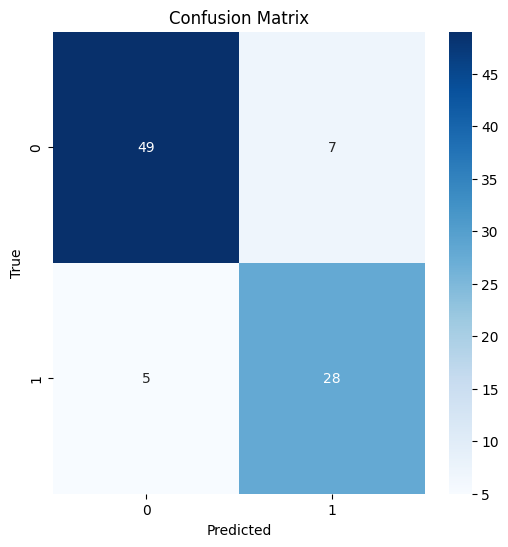

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # 分類問題の場合
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# データの読み込み
train_data = pd.read_csv('train.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')

# 目的変数と特徴量の分離
target = train_data['survived']
train_data = train_data.drop(['survived'], axis=1)

# 不要なカラムの削除
drop_columns = ['id', 'fare', 'embarked']
train_data = train_data.drop(columns=drop_columns, errors='ignore')
test_data = test_data.drop(columns=drop_columns, errors='ignore')

# 性別のラベルエンコード
if 'sex' in train_data.columns:
    le = LabelEncoder()
    train_data['sex'] = le.fit_transform(train_data['sex'])

if 'sex' in test_data.columns:
    le = LabelEncoder()
    test_data['sex'] = le.fit_transform(test_data['sex'])

# 欠損値の補完
# 数値データの欠損値は平均値で補完
train_data = train_data.fillna(train_data.select_dtypes(include=['number']).mean())
test_data = test_data.fillna(test_data.select_dtypes(include=['number']).mean())

# カテゴリカルデータの欠損値は最頻値で補完
train_data = train_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)
test_data = test_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)

# 特徴量とターゲットを定義
X_train = train_data
y_train = target

# データの分割（学習用と検証用）
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# モデルのインスタンス化
model = RandomForestClassifier(random_state=42)

# モデルの学習
model.fit(X_train_split, y_train_split)

# 検証データでの予測
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)  # 分類問題なので精度を評価
print("Validation Accuracy:", val_accuracy)

# テストデータでの予測
test_predictions = model.predict(test_data)

# 結果の保存（id列をtest_dataから取得）
output = pd.DataFrame({'id': test_data.index, 'Result': test_predictions})
output.to_csv('submission.tsv', sep='\t', index=False, header=False)


# submission.tsv と sample_submit.tsv を読み込む
submission = pd.read_csv('submission.tsv', sep='\t')
sample_submit = pd.read_csv('sample_submit.tsv', sep='\t')

# sample_submit の1列目のデータを submission の1列目に上書き
submission.iloc[:, 0] = sample_submit.iloc[:, 0]

# 上書きした結果を新しいファイルに保存
submission.to_csv('submission_updated.tsv', sep='\t', index=False)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 混同行列の作成
conf_matrix = confusion_matrix(y_val, val_predictions)

# 混同行列のヒートマップをプロット
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


